<a href="https://colab.research.google.com/github/jossus657/hack4la-projects/blob/main/311_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 311 Data Exploration
## Instructions
Copy this notebook and rename it. This is just a template to get started on data exploration for 311 Data. The sky is the limit as to what you want to do with it.

311 data for 2022 can be found in [this](https://drive.google.com/drive/folders/1d5xfqRCaMlhjhhM-o1pNMmZQGErLoBCD?usp=drive_link) drive. You can mount the drive to a notebook to access the data. Alternatively, you can download the files and run a local Jupyter notebook.

In [1]:
# Installs
pip install -U pandasql

SyntaxError: ignored

In [2]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Imports
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import folium.plugins as plugins

from pandasql import sqldf
# Pandasql Helper function
# pysqldf = lambda q: sqldf(q, globals())

def pysqldf(q):
    "add this to your script if you get tired of calling locals()"
    return sqldf(q, globals())

## Append monthly Parquet data files into full year database

In [ ]:
# List of file paths for each month
# /content/drive/Shareddrives/311-data.org/311-data.org/1 - Data Science/Collab Notebooks/Data/2022/2022_1.parquet
file_paths = [f'/content/drive/Shareddrives/311-data.org/collab_notebooks/data/2022/2022_{month}.parquet' for month in range(1, 13)]

# Create an empty DataFrame to store the combined data
df = pd.DataFrame()

# Iterate over the file paths and append the data
for file_path in file_paths:
    # Read the Parquet file for each month
    data = pq.read_table(file_path).to_pandas()

    # Convert 'ZipCode' column to string type
    data['ZipCode'] = data['ZipCode'].astype(str)

    # Append the data to the combined DataFrame
    df = pd.concat([df, data], ignore_index=True)

# Save the combined data as a new Parquet file representing a full year
df.to_parquet('2022FY.parquet', engine='pyarrow')

Combined data sample

In [ ]:
df_2022 = pd.read_parquet('2022FY.parquet')
print(df_2022.head())

       SRNumber             CreatedDate             UpdatedDate ActionTaken  \
0  1-2154996101  01/01/2022 12:08:14 AM  01/03/2022 10:39:18 PM  SR Created   
1  1-2154995181  01/01/2022 12:15:59 AM  01/01/2022 01:06:13 PM  SR Created   
2  1-2154996311  01/01/2022 12:24:31 AM  01/03/2022 12:21:42 AM  SR Created   
3  1-2154996331  01/01/2022 12:24:38 AM  01/03/2022 09:37:09 AM  SR Created   
4  1-2155001411  01/01/2022 12:28:49 AM  01/01/2022 12:42:08 PM  SR Created   

   Owner                 RequestType     Status RequestSource  \
0  LASAN                 Bulky Items     Closed  Self Service   
1  LASAN         Dead Animal Removal     Closed          Call   
2  LASAN                 Bulky Items  Cancelled  Self Service   
3  LASAN  Metal/Household Appliances  Cancelled  Self Service   
4    ITA                       Other     Closed    Mobile App   

  CreatedByUserOrganization MobileOS  ...                         Location  \
0          Self Service_SAN           ...  (33.981228795

## 311 Data by Request Type - 2022

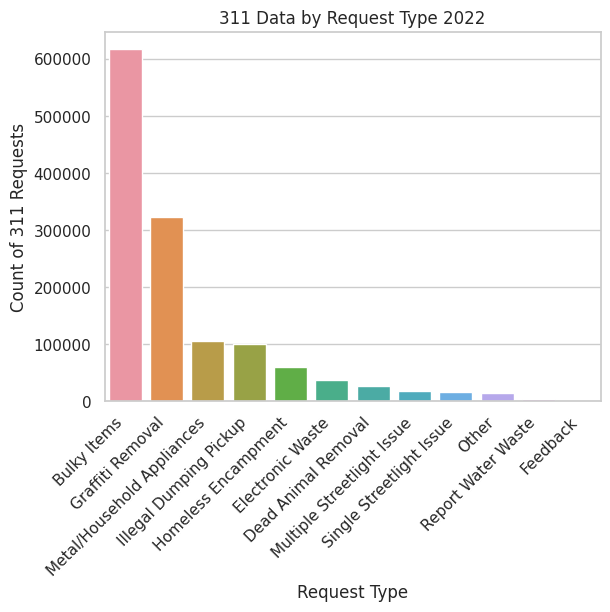

In [ ]:
# Read Parquet file into DataFrame
df = pd.read_parquet('2022FY.parquet')

# Set the seaborn style
sns.set(style="whitegrid")

# Get the value counts and sort them
RT_counts = df['RequestType'].value_counts().sort_values(ascending=False)

# Plot the bar chart
ax = sns.countplot(x='RequestType', data=df, order=RT_counts.index)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels and title
plt.xlabel('Request Type')
plt.ylabel('Count of 311 Requests')
plt.title('311 Data by Request Type 2022')

# Show the plot
plt.show()

## 311 Data by LA Neighboorhood Council Name - 2022

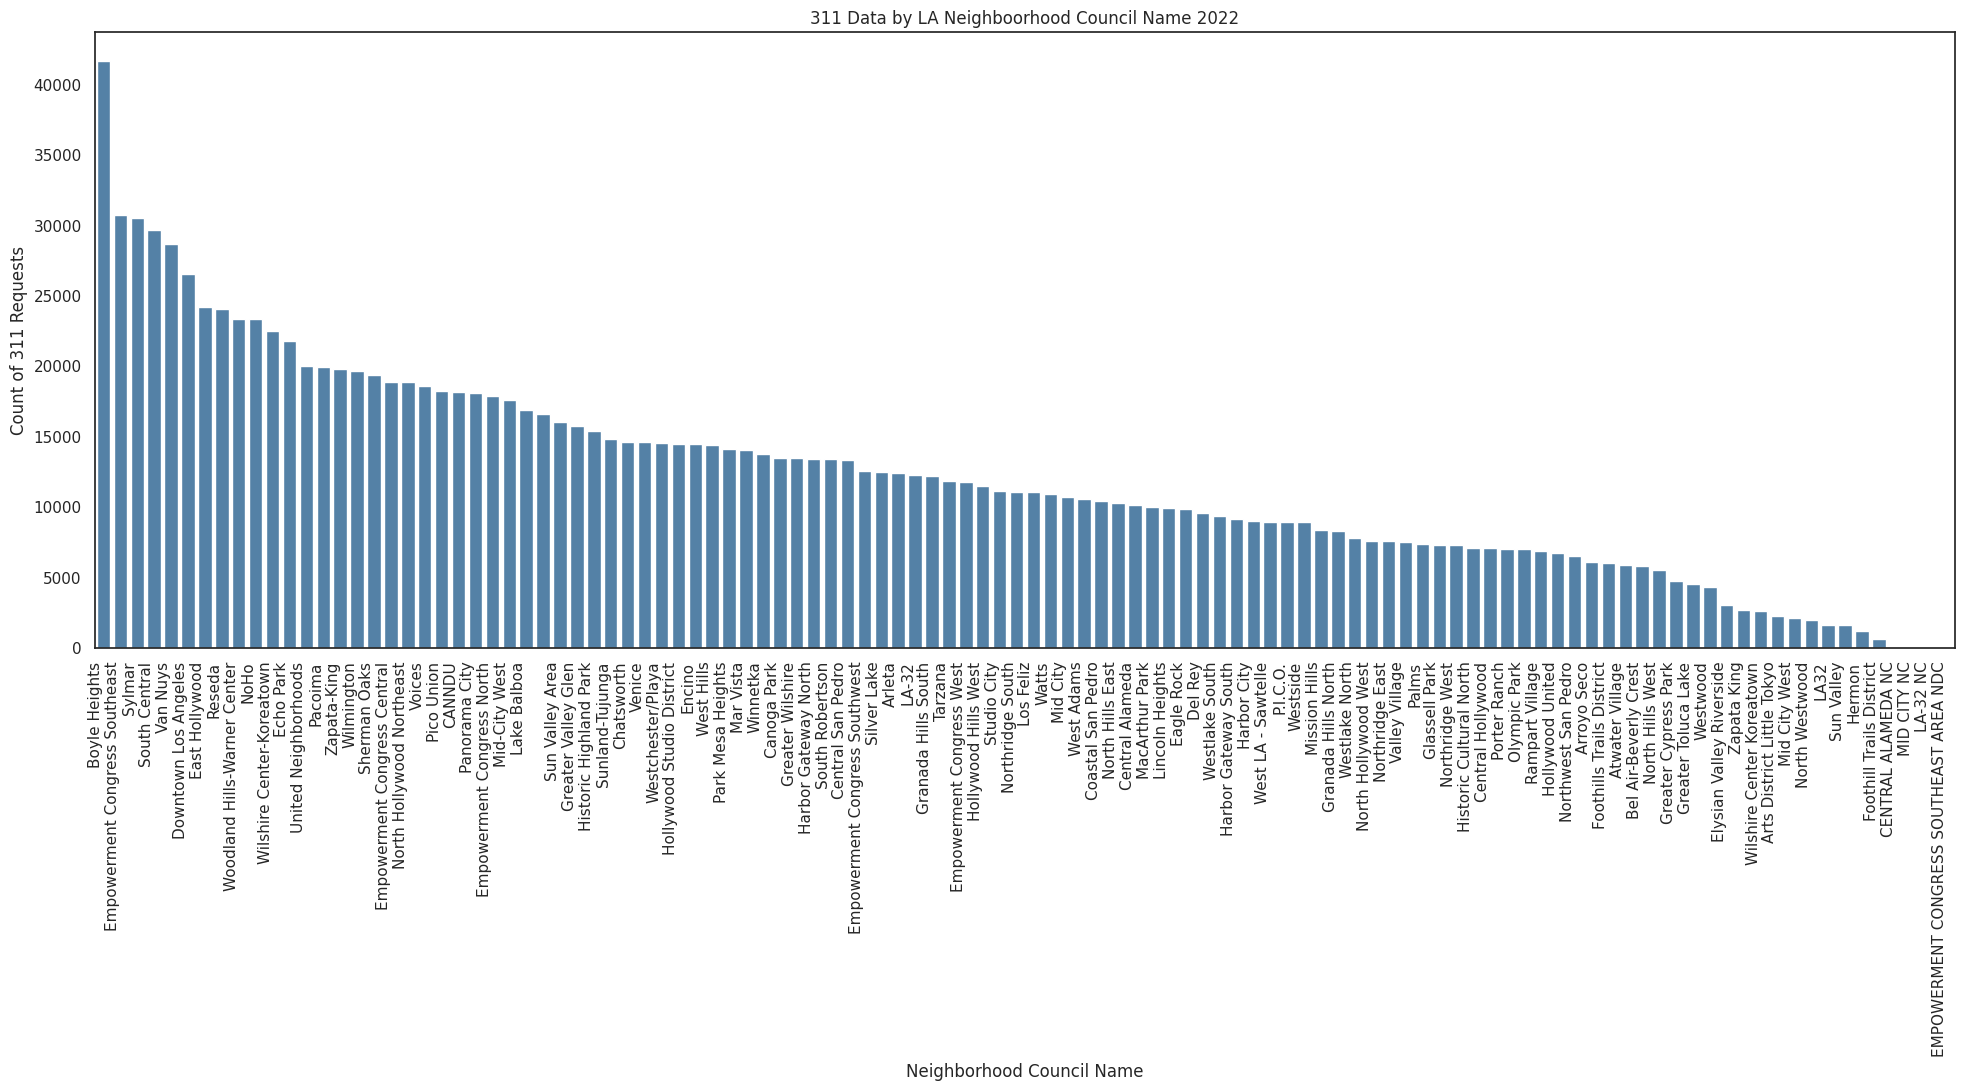

In [ ]:
# Read Parquet file into DataFrame
df = pd.read_parquet('2022FY.parquet')

# Set the seaborn style
sns.set(style="white")

# Get the value counts and sort them
NC_counts = df['NCName'].value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(24, 8))

# Plot the bar chart
ax = sns.countplot(x='NCName', data=df, order=NC_counts.index, color='steelblue')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add labels and title
plt.xlabel('Neighborhood Council Name')
plt.ylabel('Count of 311 Requests')
plt.title('311 Data by LA Neighboorhood Council Name 2022')

# Show the plot
plt.show()

## 311 Data Heatmapping - 2022
Limiting this to one month of data because of colab notebook rate limits. You could use the combined file with a local setup or a paid colab plan

In [ ]:
# Load the data from excel into a pandas dataframe
df = pd.read_parquet(f'/content/drive/Shareddrives/311-data.org/collab_notebooks/data/2022/2022_1.parquet')

# Remove NaN values from latitude and longitude
remove_nan = ['Latitude', 'Longitude']
df_LL = df.dropna(subset=remove_nan)

# Create a map centered on the mean latitude and longitude
map_center = [df_LL['Latitude'].mean(), df_LL['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=16)

# Create a list of latitude-longitude pairs
locations = df_LL[['Latitude', 'Longitude']].values.tolist()

# Add the heatmap layer to the map
heat_map = folium.plugins.HeatMap(locations)
heat_map.add_to(m)

# Display the map
m